# Import ```FLAME``` and ```flame-utils``` module

In [1]:
from flame import Machine
from flame_utils import ModelFlame, hplot

# Create ```ModelFlame``` object from lattice file ('PS_demo.lat')

In [2]:
fm = ModelFlame(lat_file='./PS_demo.lat')

# Run ```FLAME```

In [3]:
r, s = fm.run()

# Plot transverse beam envelopes

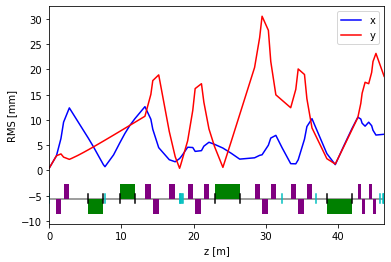

In [4]:
hplot('xrms', 'yrms', machine=fm)

# Check finite beam size

In [5]:
r, s = fm.run()
print('xrms = {} [mm]'.format(s.xrms))
print('yrms = {} [mm]'.format(s.yrms))

xrms = 7.170075852777757 [mm]
yrms = 18.641418836190123 [mm]


# Import ```scipy``` and optimizer

In [6]:
import numpy as np
from scipy.optimize import minimize

# Define desired value and cost function

In [7]:
desired = np.array([1.5, 1.5])

def cost(x):
    fm.reconfigure('qd1', {'B2': (x[0])})
    fm.reconfigure('qd2', {'B2': (x[1])})
    fm.reconfigure('qd3', {'B2': (x[2])})
    fm.reconfigure('qd4', {'B2': (x[3])})
    r, s = fm.run()
    dif = np.array([s.xrms, s.yrms]) - desired
    return sum(dif*dif)    

# Optimization

In [8]:
x0 = np.array([1, -1, -1, 1])*5
ans = minimize(cost, x0, method='Nelder-Mead')

# Check optimized beam size

In [9]:
r, s = fm.run()
print('xrms = {} [mm]'.format(s.xrms))
print('yrms = {} [mm]'.format(s.yrms))

xrms = 1.5000474643045798 [mm]
yrms = 1.4999423092501054 [mm]


# Plot transverse beam envelopes

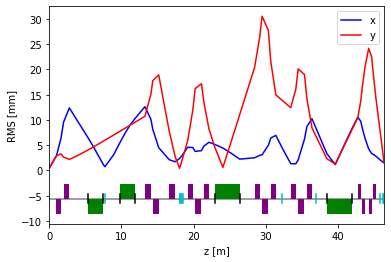

In [10]:
hplot('xrms', 'yrms', machine=fm)